# CAPÍTULO 3: ANÁLISIS EXPLORATORIO DE DATOS (EDA)


In [ ]:
# Importar configuración compartida
import sys
sys.path.append('..')
from config import *
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [ ]:
# Cargar datos
df = pd.read_csv(os.path.join(RAW_DATA_DIR, 'heart.csv'))
print(f"Dataset cargado: {df.shape}")


<a id='3-eda'></a>
# 3. Análisis Exploratorio de Datos (EDA)

El Análisis Exploratorio de Datos permite comprender la estructura, distribución y relaciones presentes en el dataset, identificando patrones, anomalías y características relevantes que guiarán el preprocesamiento y modelado posterior.

<a id='31-missing'></a>
## 3.1 Análisis de Valores Faltantes

Identificación y cuantificación de valores faltantes en el dataset.

In [9]:
# ============================================================================
# ANÁLISIS DE VALORES FALTANTES
# ============================================================================

print("\n" + "="*80)
print("ANÁLISIS DE VALORES FALTANTES")
print("="*80)

# Contar valores faltantes
missing_data = pd.DataFrame({
    'Total_Nulos': df.isnull().sum(),
    'Porcentaje (%)': (df.isnull().sum() / len(df) * 100).round(2)
}).sort_values(by='Total_Nulos', ascending=False)

print("\nValores faltantes por variable:")
print("-"*80)
print(missing_data)
print("-"*80)

total_missing = df.isnull().sum().sum()
total_cells = df.shape[0] * df.shape[1]
pct_missing = (total_missing / total_cells) * 100

print(f"\nTotal de valores faltantes: {total_missing} ({pct_missing:.2f}% del dataset)")

if total_missing == 0:
    print("\n✅ EXCELENTE: No se encontraron valores faltantes en el dataset")
    print("   Este dataset está completo y listo para análisis sin imputación.")
else:
    print(f"\n⚠️  Se encontraron {total_missing} valores faltantes")
    print(f"   Estrategia de imputación será necesaria en la fase de preprocesamiento.")

    # Visualización solo si hay missing values
    fig, axes = plt.subplots(1, 2, figsize=(14, 5))

    # Matriz de valores faltantes
    msno.matrix(df, ax=axes[0], sparkline=False, fontsize=10)
    axes[0].set_title('Matriz de Valores Faltantes', fontsize=12, fontweight='bold')

    # Gráfico de barras
    missing_pct = (df.isnull().sum() / len(df) * 100).sort_values(ascending=True)
    missing_pct[missing_pct > 0].plot(kind='barh', ax=axes[1], color=COLOR_PALETTE[1])
    axes[1].set_title('Porcentaje de Valores Faltantes por Variable', fontsize=12, fontweight='bold')
    axes[1].set_xlabel('Porcentaje (%)', fontsize=10)
    axes[1].grid(alpha=0.3, axis='x')

    plt.tight_layout()
    plt.savefig(f'{OUTPUT_DIR}/02_missing_values.png', dpi=DPI_SAVE, bbox_inches='tight')
    plt.show()

    print(f"\n✓ Figura guardada: {OUTPUT_DIR}/02_missing_values.png")

print("="*80)


ANÁLISIS DE VALORES FALTANTES

Valores faltantes por variable:
--------------------------------------------------------------------------------
          Total_Nulos  Porcentaje (%)
age                 0             0.0
sex                 0             0.0
cp                  0             0.0
trestbps            0             0.0
chol                0             0.0
fbs                 0             0.0
restecg             0             0.0
thalach             0             0.0
exang               0             0.0
oldpeak             0             0.0
slope               0             0.0
ca                  0             0.0
thal                0             0.0
num                 0             0.0
--------------------------------------------------------------------------------

Total de valores faltantes: 0 (0.00% del dataset)

✅ EXCELENTE: No se encontraron valores faltantes en el dataset
   Este dataset está completo y listo para análisis sin imputación.


<a id='321-continuas'></a>
### 3.2.1 Distribución de Variables Continuas

Análisis de la distribución de cada variable continua mediante histogramas, boxplots y estadísticas de forma.


ANÁLISIS DE DISTRIBUCIONES - VARIABLES CONTINUAS

Análisis de forma de distribuciones:
--------------------------------------------------------------------------------


,Variable,Media,Mediana,Desv_Std,Skewness,Kurtosis
0,age,54.439,56.0,9.039,-0.209,-0.523
1,trestbps,131.690,130.0,17.600,0.706,0.880
2,chol,246.693,241.0,51.777,1.136,4.492
3,thalach,149.607,153.0,22.875,-0.537,-0.054
4,oldpeak,1.040,0.8,1.161,1.270,1.576



📊 Interpretación de Skewness y Kurtosis:
--------------------------------------------------------------------------------
• age         : Distribución aproximadamente simétrica, platicúrtica (colas ligeras)
• trestbps    : Distribución sesgada a la derecha (positiva), leptocúrtica (colas pesadas)
• chol        : Distribución sesgada a la derecha (positiva), leptocúrtica (colas pesadas)
• thalach     : Distribución sesgada a la izquierda (negativa), mesocúrtica (normal)
• oldpeak     : Distribución sesgada a la derecha (positiva), leptocúrtica (colas pesadas)


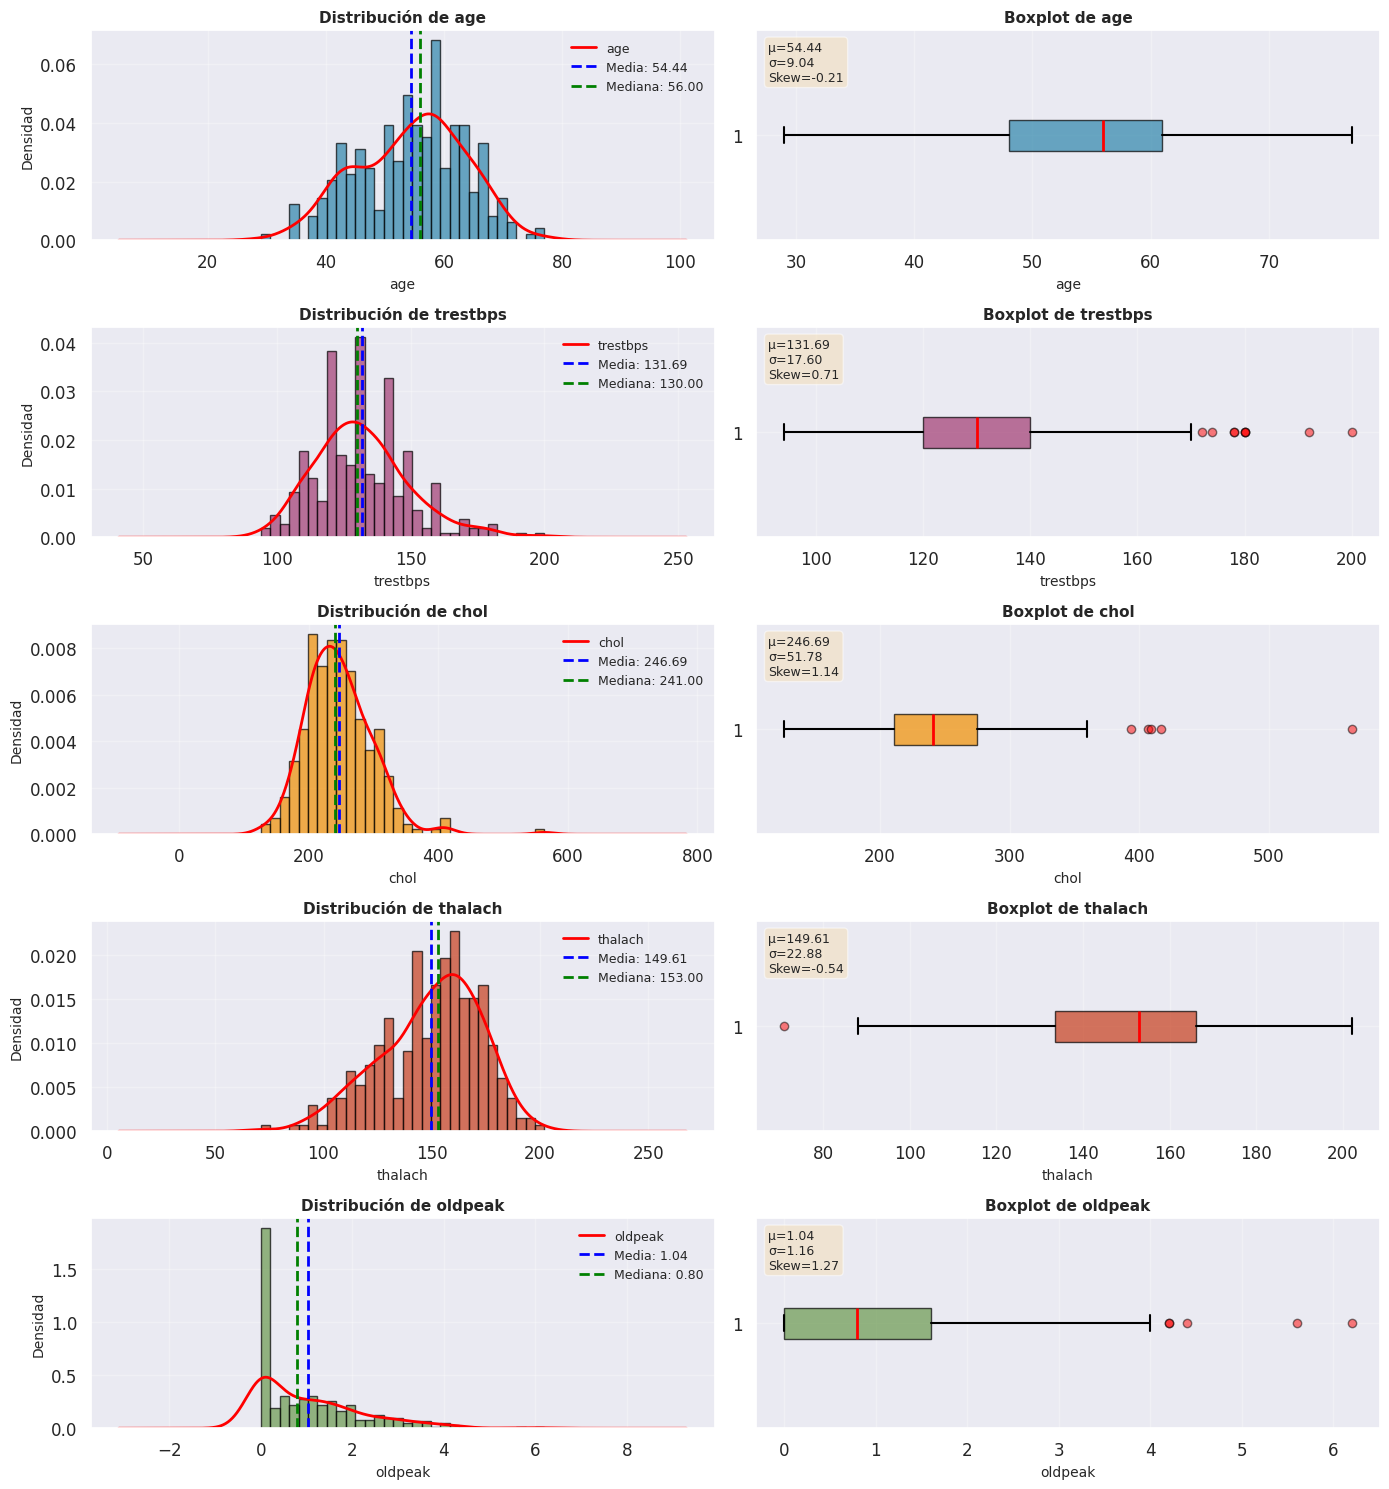


✓ Figura guardada: outputs/03_continuous_distributions.png


In [10]:
# ============================================================================
# ANÁLISIS UNIVARIADO - VARIABLES CONTINUAS
# ============================================================================

# Definir variables continuas
continuous_vars = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak']

print("\n" + "="*80)
print("ANÁLISIS DE DISTRIBUCIONES - VARIABLES CONTINUAS")
print("="*80)

# Análisis de normalidad y forma
print("\nAnálisis de forma de distribuciones:")
print("-"*80)

dist_analysis = pd.DataFrame({
    'Variable': continuous_vars,
    'Media': [df[var].mean() for var in continuous_vars],
    'Mediana': [df[var].median() for var in continuous_vars],
    'Desv_Std': [df[var].std() for var in continuous_vars],
    'Skewness': [df[var].skew() for var in continuous_vars],
    'Kurtosis': [df[var].kurtosis() for var in continuous_vars]
})

display(dist_analysis.round(3))

# Kurtosis y skewness seran factores a tomar en la decision de los modelos
print("\n📊 Interpretación de Skewness y Kurtosis:")
print("-"*80)
for var in continuous_vars:
    skew = df[var].skew()
    kurt = df[var].kurtosis()

    # Interpretación de skewness
    if abs(skew) < 0.5:
        skew_interp = "aproximadamente simétrica"
    elif skew < -0.5:
        skew_interp = "sesgada a la izquierda (negativa)"
    else:
        skew_interp = "sesgada a la derecha (positiva)"

    # Interpretación de kurtosis
    if abs(kurt) < 0.5:
        kurt_interp = "mesocúrtica (normal)"
    elif kurt < -0.5:
        kurt_interp = "platicúrtica (colas ligeras)"
    else:
        kurt_interp = "leptocúrtica (colas pesadas)"

    print(f"• {var:12s}: Distribución {skew_interp}, {kurt_interp}")

print("="*80)

# Visualización: Histogramas + KDE + Boxplots
fig, axes = plt.subplots(len(continuous_vars), 2, figsize=(14, len(continuous_vars)*3))

for idx, var in enumerate(continuous_vars):
    # Histograma + KDE
    axes[idx, 0].hist(df[var].dropna(), bins=30, edgecolor='black', alpha=0.7,
                      color=COLOR_PALETTE[idx % len(COLOR_PALETTE)], density=True)

    # KDE
    df[var].dropna().plot(kind='kde', ax=axes[idx, 0], color='red', linewidth=2)

    # Líneas de media y mediana
    axes[idx, 0].axvline(df[var].mean(), color='blue', linestyle='--', linewidth=2,
                         label=f'Media: {df[var].mean():.2f}')
    axes[idx, 0].axvline(df[var].median(), color='green', linestyle='--', linewidth=2,
                         label=f'Mediana: {df[var].median():.2f}')

    axes[idx, 0].set_title(f'Distribución de {var}', fontsize=11, fontweight='bold')
    axes[idx, 0].set_xlabel(var, fontsize=10)
    axes[idx, 0].set_ylabel('Densidad', fontsize=10)
    axes[idx, 0].legend(fontsize=9)
    axes[idx, 0].grid(alpha=0.3)

    # Boxplot
    bp = axes[idx, 1].boxplot(df[var].dropna(), vert=False, patch_artist=True,
                              boxprops=dict(facecolor=COLOR_PALETTE[idx % len(COLOR_PALETTE)], alpha=0.7),
                              medianprops=dict(color='red', linewidth=2),
                              whiskerprops=dict(linewidth=1.5),
                              capprops=dict(linewidth=1.5),
                              flierprops=dict(marker='o', markerfacecolor='red', markersize=6, alpha=0.5))

    axes[idx, 1].set_title(f'Boxplot de {var}', fontsize=11, fontweight='bold')
    axes[idx, 1].set_xlabel(var, fontsize=10)
    axes[idx, 1].grid(alpha=0.3)

    # Añadir estadísticas al boxplot
    stats_text = f"μ={df[var].mean():.2f}\nσ={df[var].std():.2f}\nSkew={df[var].skew():.2f}"
    axes[idx, 1].text(0.02, 0.95, stats_text, transform=axes[idx, 1].transAxes,
                      fontsize=9, verticalalignment='top',
                      bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.5))

plt.tight_layout()
plt.savefig(f'{OUTPUT_DIR}/03_continuous_distributions.png', dpi=DPI_SAVE, bbox_inches='tight')
plt.show()

print(f"\n✓ Figura guardada: {OUTPUT_DIR}/03_continuous_distributions.png")

<a id='322-categoricas'></a>
### 3.2.2 Distribución de Variables Categóricas

Análisis de frecuencias y proporciones de las variables categóricas.


ANÁLISIS DE DISTRIBUCIONES - VARIABLES CATEGÓRICAS

Frecuencias absolutas y relativas:
--------------------------------------------------------------------------------

📊 Variable: sex
 Valor  Frecuencia  Porcentaje (%)
   0.0          97           32.01
   1.0         206           67.99

📊 Variable: cp
 Valor  Frecuencia  Porcentaje (%)
   1.0          23            7.59
   2.0          50           16.50
   3.0          86           28.38
   4.0         144           47.52

📊 Variable: fbs
 Valor  Frecuencia  Porcentaje (%)
   0.0         258           85.15
   1.0          45           14.85

📊 Variable: restecg
 Valor  Frecuencia  Porcentaje (%)
   0.0         151           49.83
   1.0           4            1.32
   2.0         148           48.84

📊 Variable: exang
 Valor  Frecuencia  Porcentaje (%)
   0.0         204           67.33
   1.0          99           32.67

📊 Variable: slope
 Valor  Frecuencia  Porcentaje (%)
   1.0         142           46.86
   2.0         140    

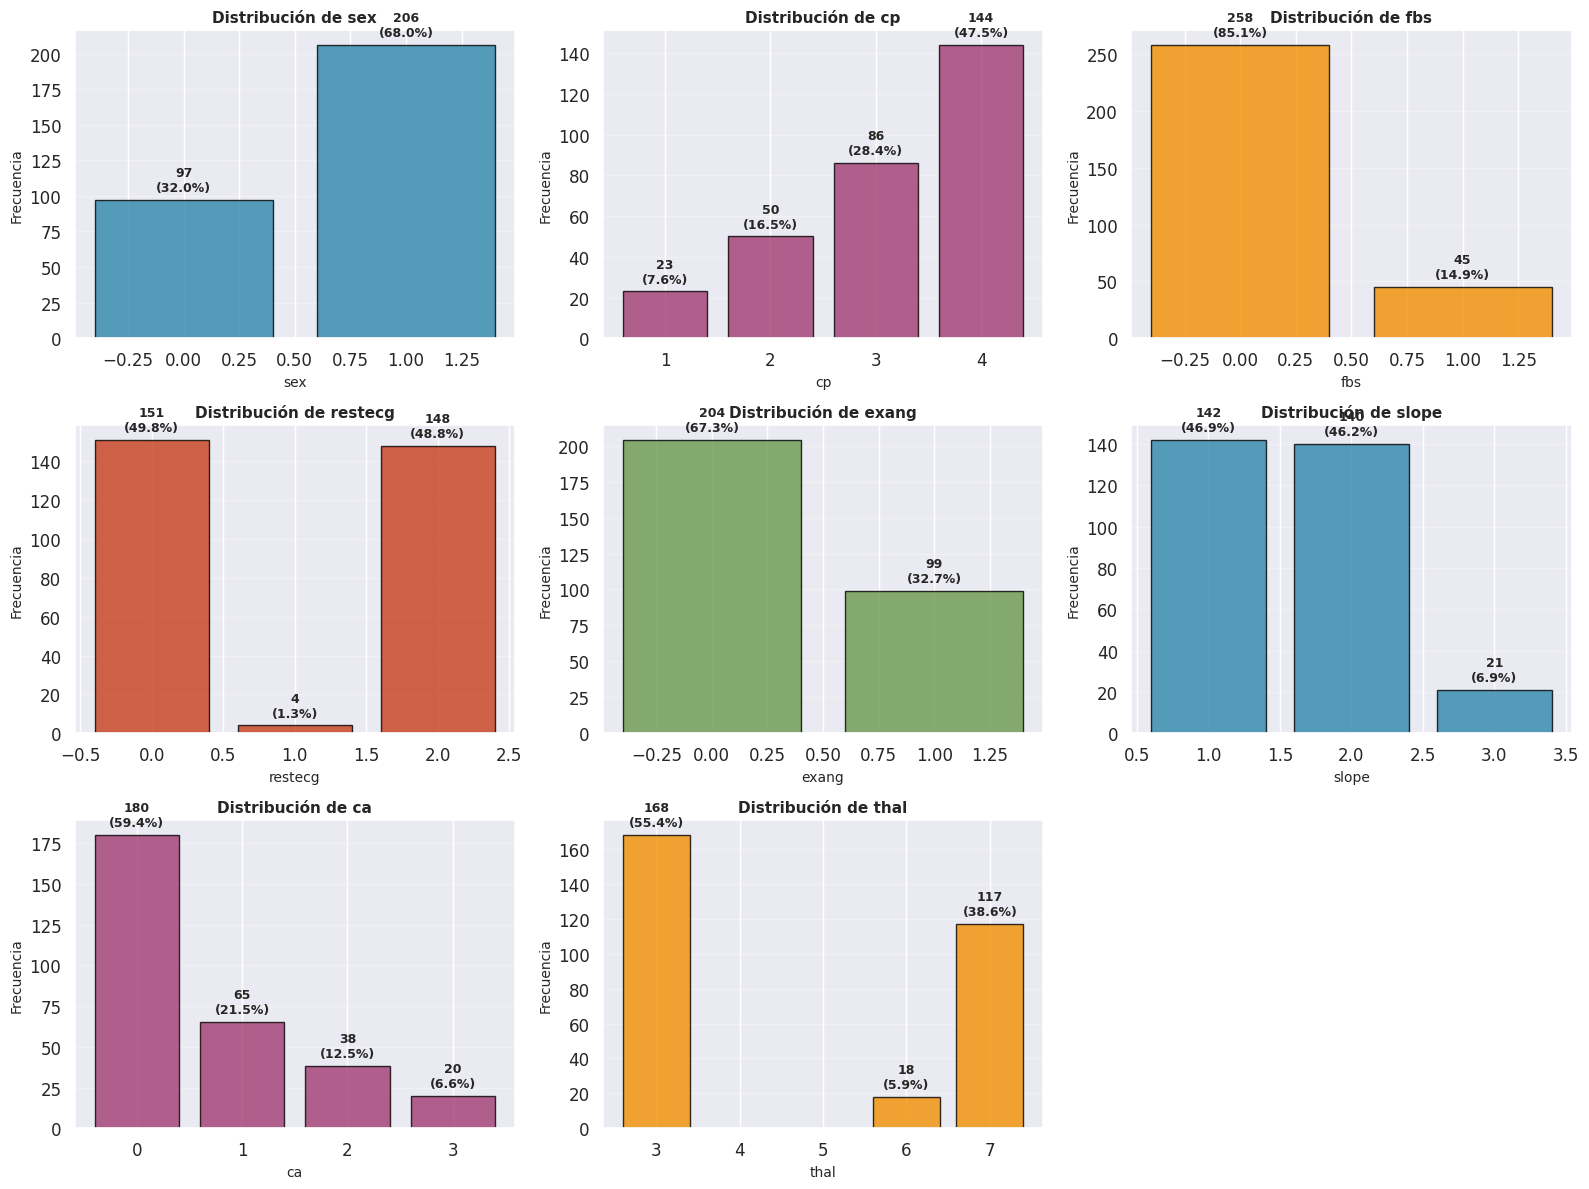


✓ Figura guardada: outputs/04_categorical_distributions.png


In [11]:
# ============================================================================
# ANÁLISIS UNIVARIADO - VARIABLES CATEGÓRICAS
# ============================================================================

categorical_vars = ['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal']

print("\n" + "="*80)
print("ANÁLISIS DE DISTRIBUCIONES - VARIABLES CATEGÓRICAS")
print("="*80)

# Frecuencias de cada variable
print("\nFrecuencias absolutas y relativas:")
print("-"*80)

for var in categorical_vars:
    print(f"\n📊 Variable: {var}")
    freq = df[var].value_counts().sort_index() #Frecuencia numerica
    pct = (df[var].value_counts(normalize=True) * 100).sort_index() # Porcentaje

    freq_table = pd.DataFrame({
        'Valor': freq.index,
        'Frecuencia': freq.values,
        'Porcentaje (%)': pct.round(2).values
    })
    print(freq_table.to_string(index=False))

print("="*80)

# Visualización
n_cols = 3
n_rows = int(np.ceil(len(categorical_vars) / n_cols))
fig, axes = plt.subplots(n_rows, n_cols, figsize=(16, n_rows*4))
axes = axes.flatten()

for idx, var in enumerate(categorical_vars):
    value_counts = df[var].value_counts().sort_index()

    # Gráfico de barras
    axes[idx].bar(value_counts.index, value_counts.values,
                  color=COLOR_PALETTE[idx % len(COLOR_PALETTE)],
                  edgecolor='black', alpha=0.8)

    axes[idx].set_title(f'Distribución de {var}', fontsize=11, fontweight='bold')
    axes[idx].set_xlabel(var, fontsize=10)
    axes[idx].set_ylabel('Frecuencia', fontsize=10)
    axes[idx].grid(alpha=0.3, axis='y')

    # Agregar valores y porcentajes en las barras
    for i, v in enumerate(value_counts):
        pct = (v / len(df)) * 100
        axes[idx].text(value_counts.index[i], v + max(value_counts)*0.02,
                      f'{v}\n({pct:.1f}%)',
                      ha='center', va='bottom', fontsize=9, fontweight='bold')

# Ocultar ejes sobrantes
for idx in range(len(categorical_vars), len(axes)):
    axes[idx].axis('off')

plt.tight_layout()
plt.savefig(f'{OUTPUT_DIR}/04_categorical_distributions.png', dpi=DPI_SAVE, bbox_inches='tight')
plt.show()

print(f"\n✓ Figura guardada: {OUTPUT_DIR}/04_categorical_distributions.png")

<a id='331-cont-target'></a>
### 3.3.1 Relación entre Variables Continuas y Variable Objetivo

Análisis de cómo las variables continuas se distribuyen según la presencia o ausencia de enfermedad cardiovascular.


VARIABLES CONTINUAS VS VARIABLE OBJETIVO

Comparación de medias entre grupos:
--------------------------------------------------------------------------------


,Variable,Media_Sin_Enfermedad,Media_Con_Enfermedad,Diferencia
0,age,52.59,56.63,4.04
1,trestbps,129.25,134.57,5.32
2,chol,242.64,251.47,8.83
3,thalach,158.38,139.26,-19.12
4,oldpeak,0.59,1.57,0.99



📊 Interpretación clínica de diferencias:
--------------------------------------------------------------------------------
• age         :   7.7% mayor en pacientes con enfermedad
• trestbps    :   4.1% mayor en pacientes con enfermedad
• chol        :   3.6% mayor en pacientes con enfermedad
• thalach     :  12.1% menor en pacientes con enfermedad
• oldpeak     : 168.3% mayor en pacientes con enfermedad


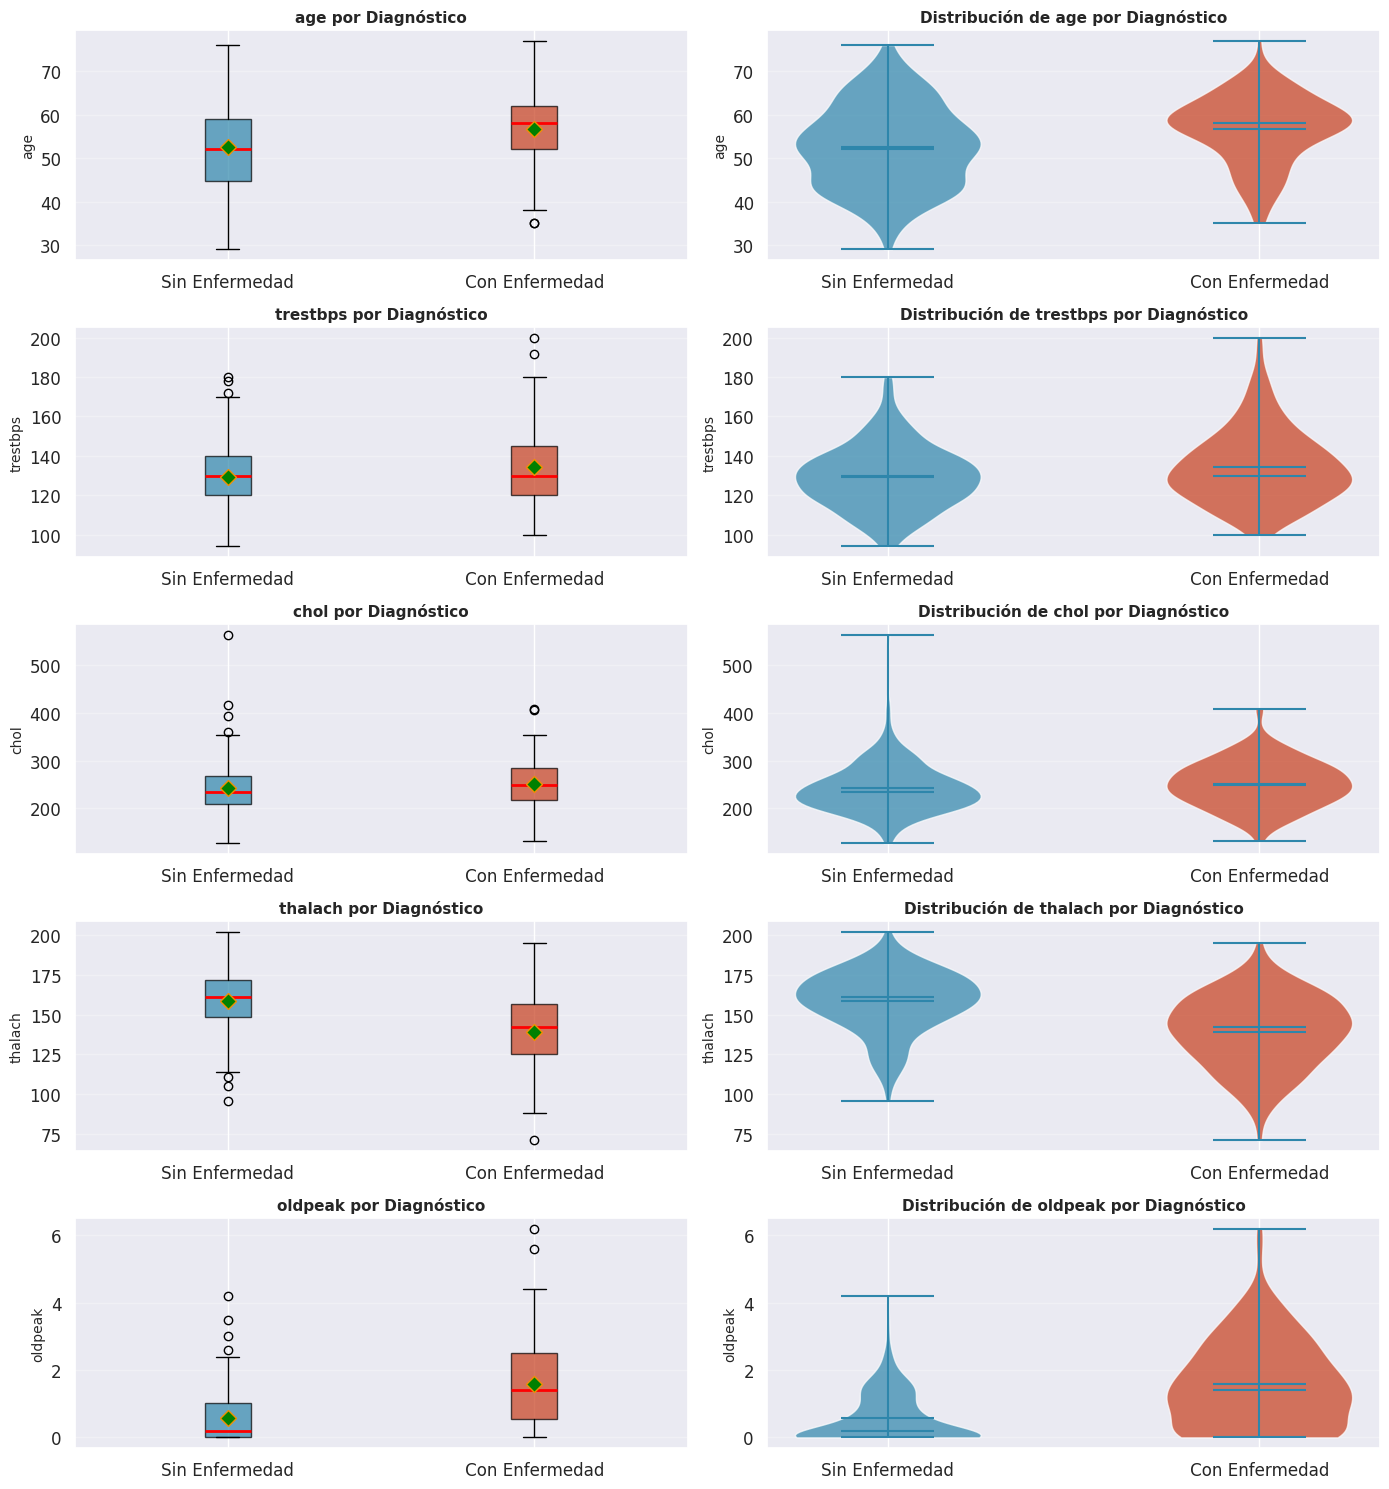


✓ Figura guardada: outputs/05_continuous_vs_target.png


In [12]:
# ============================================================================
# ANÁLISIS BIVARIADO - CONTINUAS VS TARGET
# ============================================================================

print("\n" + "="*80)
print("VARIABLES CONTINUAS VS VARIABLE OBJETIVO")
print("="*80)

# Crear variable objetivo binaria temporal para análisis
df['target_binary'] = (df['num'] > 0).astype(int)

# Comparación de medias por grupo
print("\nComparación de medias entre grupos:")
print("-"*80)

comparison = pd.DataFrame({
    'Variable': continuous_vars,
    'Media_Sin_Enfermedad': [df[df['target_binary']==0][var].mean() for var in continuous_vars],
    'Media_Con_Enfermedad': [df[df['target_binary']==1][var].mean() for var in continuous_vars],
    'Diferencia': [df[df['target_binary']==1][var].mean() - df[df['target_binary']==0][var].mean()
                   for var in continuous_vars]
})

display(comparison.round(2))

print("\n📊 Interpretación clínica de diferencias:")
print("-"*80)
for var in continuous_vars:
    mean_no_disease = df[df['target_binary']==0][var].mean()
    mean_disease = df[df['target_binary']==1][var].mean()
    diff = mean_disease - mean_no_disease
    pct_diff = (diff / mean_no_disease) * 100

    direction = "mayor" if diff > 0 else "menor"
    print(f"• {var:12s}: {abs(pct_diff):5.1f}% {direction} en pacientes con enfermedad")

print("="*80)

# Visualización: Boxplots y Violin plots
fig, axes = plt.subplots(len(continuous_vars), 2, figsize=(14, len(continuous_vars)*3))

for idx, var in enumerate(continuous_vars):
    # Boxplot por grupo
    data_to_plot = [df[df['target_binary']==0][var].dropna(),
                    df[df['target_binary']==1][var].dropna()]

    bp = axes[idx, 0].boxplot(data_to_plot, labels=['Sin Enfermedad', 'Con Enfermedad'],
                              patch_artist=True, showmeans=True,
                              boxprops=dict(alpha=0.7),
                              medianprops=dict(color='red', linewidth=2),
                              meanprops=dict(marker='D', markerfacecolor='green', markersize=8))

    # Colorear boxplots
    colors = [COLOR_PALETTE[0], COLOR_PALETTE[3]]
    for patch, color in zip(bp['boxes'], colors):
        patch.set_facecolor(color)

    axes[idx, 0].set_title(f'{var} por Diagnóstico', fontsize=11, fontweight='bold')
    axes[idx, 0].set_ylabel(var, fontsize=10)
    axes[idx, 0].grid(alpha=0.3, axis='y')

    # Violin plot
    parts = axes[idx, 1].violinplot([df[df['target_binary']==i][var].dropna() for i in [0, 1]],
                                     positions=[0, 1],
                                     showmeans=True, showmedians=True)

    # Colorear violin plots
    for i, pc in enumerate(parts['bodies']):
        pc.set_facecolor(colors[i])
        pc.set_alpha(0.7)

    axes[idx, 1].set_title(f'Distribución de {var} por Diagnóstico', fontsize=11, fontweight='bold')
    axes[idx, 1].set_ylabel(var, fontsize=10)
    axes[idx, 1].set_xticks([0, 1])
    axes[idx, 1].set_xticklabels(['Sin Enfermedad', 'Con Enfermedad'])
    axes[idx, 1].grid(alpha=0.3, axis='y')

plt.tight_layout()
plt.savefig(f'{OUTPUT_DIR}/05_continuous_vs_target.png', dpi=DPI_SAVE, bbox_inches='tight')
plt.show()

print(f"\n✓ Figura guardada: {OUTPUT_DIR}/05_continuous_vs_target.png")

# Eliminar variable temporal
df.drop('target_binary', axis=1, inplace=True)

<a id='34-correlacion'></a>
## 3.4 Análisis de Correlaciones

Estudio de las relaciones lineales entre variables mediante la matriz de correlación de Pearson.


ANÁLISIS DE CORRELACIONES

Correlaciones con la variable objetivo (num):
--------------------------------------------------------------------------------
ca          0.521
thal        0.507
oldpeak     0.504
cp          0.407
exang       0.397
slope       0.378
sex         0.224
age         0.223
restecg     0.184
trestbps    0.158
chol        0.071
fbs         0.059
thalach    -0.415
Name: num, dtype: float64

📊 Top 5 correlaciones más fuertes (valor absoluto):
--------------------------------------------------------------------------------
• ca          : +0.521 (correlación fuerte positiva)
• thal        : +0.507 (correlación fuerte positiva)
• oldpeak     : +0.504 (correlación fuerte positiva)
• thalach     : -0.415 (correlación moderada negativa)
• cp          : +0.407 (correlación moderada positiva)


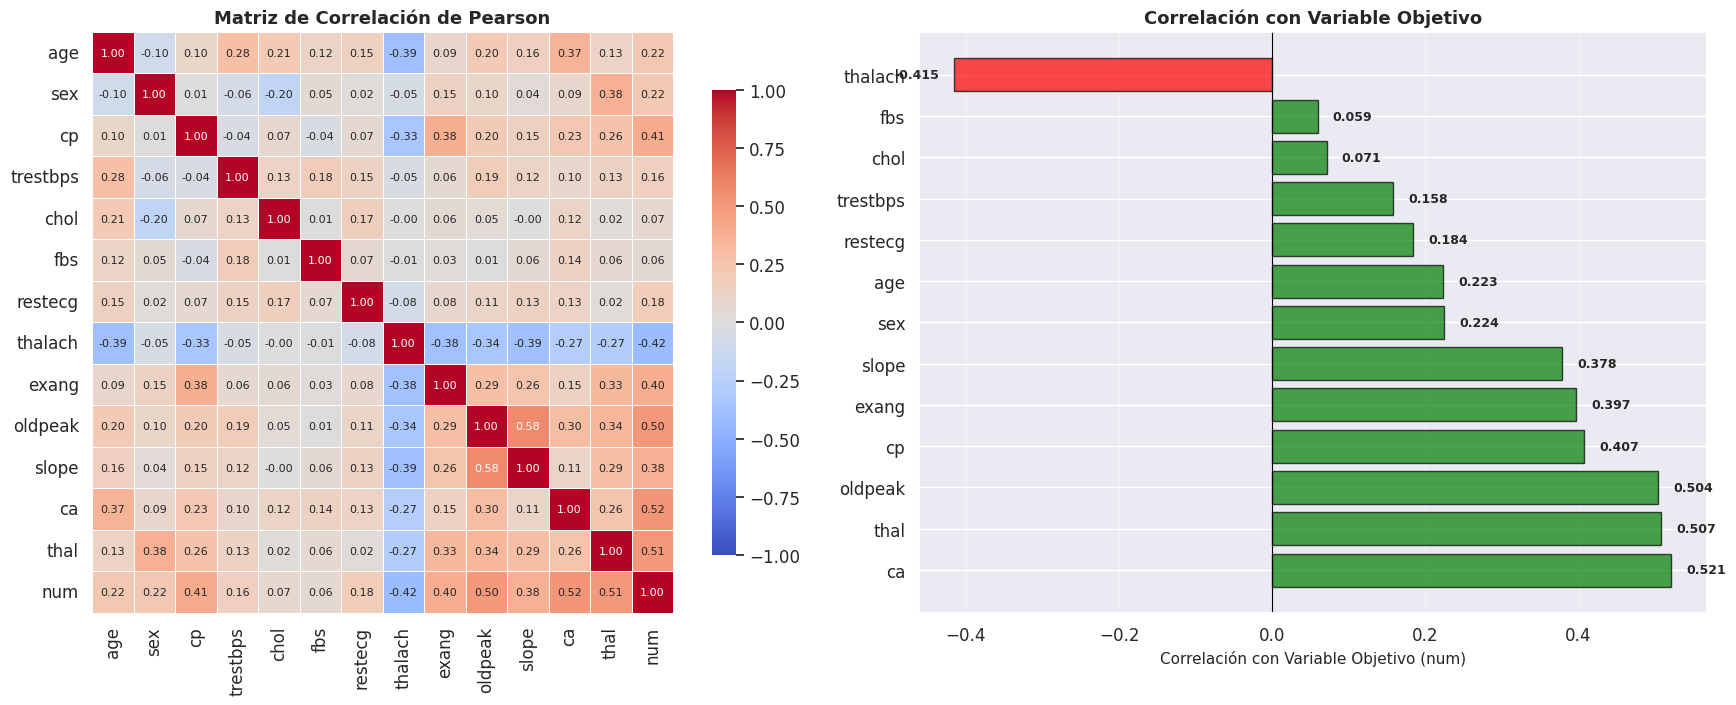


✓ Figura guardada: outputs/07_correlation_matrix.png


In [13]:
# ============================================================================
# MATRIZ DE CORRELACIÓN
# ============================================================================

print("\n" + "="*80)
print("ANÁLISIS DE CORRELACIONES")
print("="*80)

# Calcular matriz de correlación
corr_matrix = df.corr(method='pearson')

# Correlaciones con la variable objetivo
print("\nCorrelaciones con la variable objetivo (num):")
print("-"*80)
target_corr = corr_matrix['num'].sort_values(ascending=False).drop('num')
print(target_corr.round(3))

print("\n📊 Top 5 correlaciones más fuertes (valor absoluto):")
print("-"*80)
top_corr = target_corr.abs().sort_values(ascending=False).head(5)
for var, corr in top_corr.items():
    direction = "positiva" if target_corr[var] > 0 else "negativa"
    strength = "fuerte" if abs(corr) > 0.5 else "moderada" if abs(corr) > 0.3 else "débil"
    print(f"• {var:12s}: {target_corr[var]:+.3f} (correlación {strength} {direction})")

print("="*80)

# Visualización
fig, axes = plt.subplots(1, 2, figsize=(18, 7))

# Heatmap completo
sns.heatmap(corr_matrix, annot=True, fmt='.2f', cmap='coolwarm', center=0,
            square=True, linewidths=0.5, cbar_kws={"shrink": 0.8},
            ax=axes[0], vmin=-1, vmax=1, annot_kws={'size': 8})
axes[0].set_title('Matriz de Correlación de Pearson', fontsize=13, fontweight='bold')

# Correlación con variable objetivo
colors = ['green' if x > 0 else 'red' for x in target_corr]
axes[1].barh(range(len(target_corr)), target_corr.values, color=colors, alpha=0.7, edgecolor='black')
axes[1].set_yticks(range(len(target_corr)))
axes[1].set_yticklabels(target_corr.index)
axes[1].set_xlabel('Correlación con Variable Objetivo (num)', fontsize=11)
axes[1].set_title('Correlación con Variable Objetivo', fontsize=13, fontweight='bold')
axes[1].axvline(0, color='black', linewidth=0.8)
axes[1].grid(alpha=0.3, axis='x')

# Agregar valores en las barras
for i, v in enumerate(target_corr.values):
    axes[1].text(v + (0.02 if v > 0 else -0.02), i, f'{v:.3f}',
                ha='left' if v > 0 else 'right', va='center', fontsize=9, fontweight='bold')

plt.tight_layout()
plt.savefig(f'{OUTPUT_DIR}/07_correlation_matrix.png', dpi=DPI_SAVE, bbox_inches='tight')
plt.show()

print(f"\n✓ Figura guardada: {OUTPUT_DIR}/07_correlation_matrix.png")

<a id='35-outliers'></a>
## 3.5 Detección de Outliers

Identificación de valores atípicos mediante el método del Rango Intercuartílico (IQR).


DETECCIÓN DE OUTLIERS (Método IQR)

Outliers detectados por variable:
--------------------------------------------------------------------------------
• age         :   0 outliers ( 0.00%) - Rango válido: [28.50, 80.50]
• trestbps    :   9 outliers ( 2.97%) - Rango válido: [90.00, 170.00]
• chol        :   5 outliers ( 1.65%) - Rango válido: [115.00, 371.00]
• thalach     :   1 outliers ( 0.33%) - Rango válido: [84.75, 214.75]
• oldpeak     :   5 outliers ( 1.65%) - Rango válido: [-2.40, 4.00]

Resumen de outliers:


,Variable,Num_Outliers,Porcentaje (%),Límite_Inferior,Límite_Superior
0,age,0,0.00,28.50,80.50
1,trestbps,9,2.97,90.00,170.00
2,chol,5,1.65,115.00,371.00
3,thalach,1,0.33,84.75,214.75
4,oldpeak,5,1.65,-2.40,4.00



🏥 DECISIÓN CLÍNICA SOBRE OUTLIERS:
--------------------------------------------------------------------------------
En contextos médicos, los valores extremos pueden representar:
  1. Casos clínicos reales con características atípicas pero válidas
  2. Errores de medición que requieren corrección

ESTRATEGIA ADOPTADA: Conservar outliers inicialmente.
Justificación: Los valores extremos pueden contener información clínica
valiosa para el diagnóstico. Se evaluará su impacto durante el modelado.


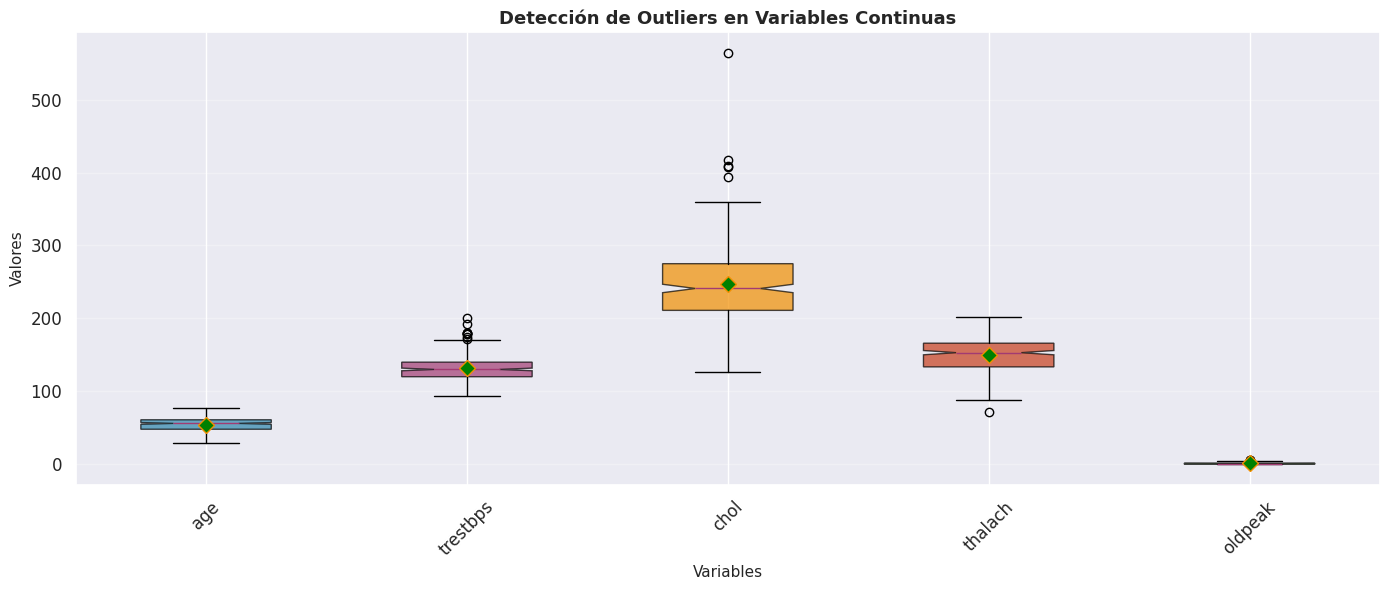


✓ Figura guardada: outputs/08_outliers_analysis.png


In [14]:
# ============================================================================
# DETECCIÓN DE OUTLIERS
# ============================================================================

print("\n" + "="*80)
print("DETECCIÓN DE OUTLIERS (Método IQR)")
print("="*80)

def detect_outliers_iqr(data, column):
    """Detecta outliers usando el método IQR"""
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    outliers = data[(data[column] < lower_bound) | (data[column] > upper_bound)]
    return outliers, lower_bound, upper_bound

# Analizar outliers para cada variable continua
outliers_summary = []

print("\nOutliers detectados por variable:")
print("-"*80)

for var in continuous_vars:
    outliers, lower, upper = detect_outliers_iqr(df, var)
    n_outliers = len(outliers)
    pct_outliers = (n_outliers / len(df)) * 100

    outliers_summary.append({
        'Variable': var,
        'Num_Outliers': n_outliers,
        'Porcentaje (%)': round(pct_outliers, 2),
        'Límite_Inferior': round(lower, 2),
        'Límite_Superior': round(upper, 2)
    })

    print(f"• {var:12s}: {n_outliers:3d} outliers ({pct_outliers:5.2f}%) - Rango válido: [{lower:.2f}, {upper:.2f}]")

outliers_df = pd.DataFrame(outliers_summary)
print("\n" + "="*80)
print("Resumen de outliers:")
display(outliers_df)

print("\n🏥 DECISIÓN CLÍNICA SOBRE OUTLIERS:")
print("-"*80)
print("En contextos médicos, los valores extremos pueden representar:")
print("  1. Casos clínicos reales con características atípicas pero válidas")
print("  2. Errores de medición que requieren corrección")
print("\nESTRATEGIA ADOPTADA: Conservar outliers inicialmente.")
print("Justificación: Los valores extremos pueden contener información clínica")
print("valiosa para el diagnóstico. Se evaluará su impacto durante el modelado.")
print("="*80)

# Visualización
fig, ax = plt.subplots(figsize=(14, 6))

bp = ax.boxplot([df[var].dropna() for var in continuous_vars],
                 labels=continuous_vars,
                 patch_artist=True,
                 notch=True,
                 showmeans=True,
                 meanprops=dict(marker='D', markerfacecolor='green', markersize=8))

# Colorear boxplots
for patch, color in zip(bp['boxes'], COLOR_PALETTE):
    patch.set_facecolor(color)
    patch.set_alpha(0.7)

ax.set_title('Detección de Outliers en Variables Continuas', fontsize=13, fontweight='bold')
ax.set_ylabel('Valores', fontsize=11)
ax.set_xlabel('Variables', fontsize=11)
ax.grid(alpha=0.3, axis='y')
plt.xticks(rotation=45)

plt.tight_layout()
plt.savefig(f'{OUTPUT_DIR}/08_outliers_analysis.png', dpi=DPI_SAVE, bbox_inches='tight')
plt.show()

print(f"\n✓ Figura guardada: {OUTPUT_DIR}/08_outliers_analysis.png")